# Segmentação de Imagens Parte 1

Primeiramente vamos relembrar o Modelo de Cores RGB. A Figura abaixo mostra o cubo de cores RGB, onde cada vértice representa uma cor pura e cada face representa uma cor secundária.

![](img/rgb_cube.png)

# 1. Mascaramento

Forma de segmentação onde uma imagem binária (pixels preto e branco) é criada a partir da imagem original, colorida ou tins de cinza, para indicar os pixels de interesse e seprá-los dos pixels de fundo. 

Na OpenCV essa imagem binária, chamada de máscara ou **mask**, é representada através de uma imagem em tons de cinza convencional, onde o valor preto `0` indica pixel de fundo e o valor branco `255` é usado para indicar o pixel de interesse.

Por exemplo vamos tentar marcar as diferentes cores em uma máscara, para isso vamos usar a imagem [cores.jpg](img/cores.jpg).

![](img/cores.jpg)

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [15, 15]

# Já invertendo os canais
cores = cv2.imread("img/cores.jpg")
cores_rgb = cv2.cvtColor(cores, cv2.COLOR_BGR2RGB)
cv2.imshow("Imagem BGR", cores)
cv2.waitKey()
cv2.destroyAllWindows()

## Histograma
Vamos visualizar o histograma da imagem para ver como estão distribuídos os pixels dentro dos possíveis valores de intensidade, que no caso é de 0 a 255.

Para isso vamos utilizar a biliboteca `matplotlib` para plotar o histograma e mostrar a imagem.
Como `matplotlib` utiliza o espaço de cores RGB, vamos converter a imagem para RGB.

### Canal Vermelho

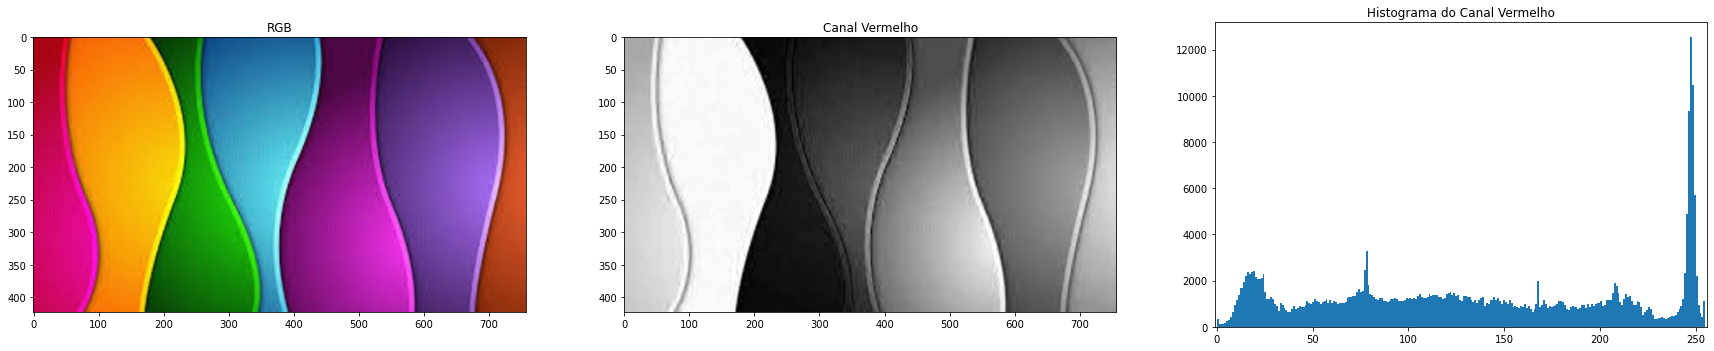

In [3]:
height, width, _ = cores_rgb.shape
plt.figure(figsize=(30, height / width * 10))  # para melhor visualização do histograma

plt.subplot(1,3,1)
plt.title("RGB")
plt.imshow(cores_rgb, cmap='gray')

# **Canal Vermelho**
plt.subplot(1,3,2)
plt.title("Canal Vermelho")
cores_r = cores_rgb[:,:,0]
plt.imshow(cores_r, cmap='gray')

plt.subplot(1,3,3)
plt.title("Histograma do Canal Vermelho")
plt.hist(cores_r.flatten(), bins=256)
plt.xlim([-1,256]) # para melhor visualização do histograma
plt.show()

### Canal Verde

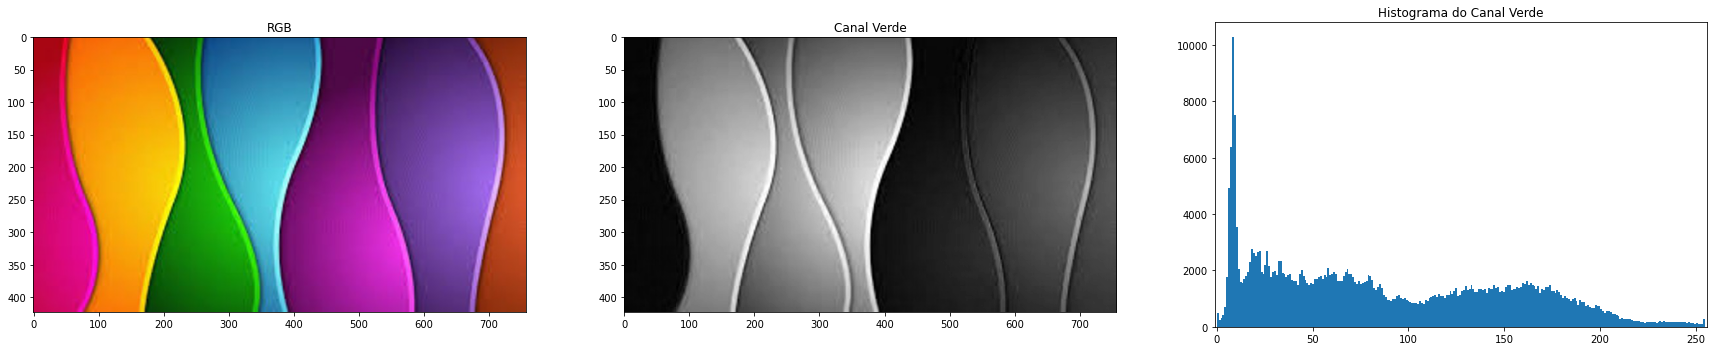

In [4]:
height, width, _ = cores_rgb.shape
plt.figure(figsize=(30, height / width * 10))  # para melhor visualização do histograma

plt.subplot(1,3,1)
plt.title("RGB")
plt.imshow(cores_rgb, cmap='gray')

# **Canal Verde**
plt.subplot(1,3,2)
plt.title("Canal Verde")
cores_g = cores_rgb[:,:,1]
plt.imshow(cores_g, cmap='gray')

plt.subplot(1,3,3)
plt.title("Histograma do Canal Verde")
plt.hist(cores_g.flatten(), bins=256)
plt.xlim([-1,256]) # para melhor visualização do histograma
plt.show()

### Canal Azul

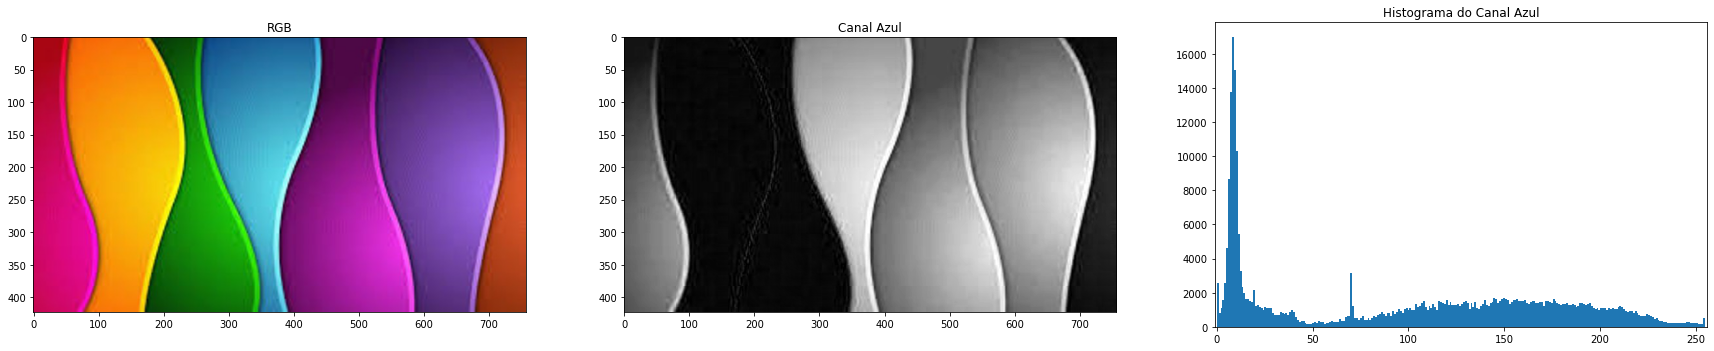

In [5]:
height, width, _ = cores_rgb.shape
plt.figure(figsize=(30, height / width * 10))  # para melhor visualização do histograma

plt.subplot(1,3,1)
plt.title("RGB")
plt.imshow(cores_rgb, cmap='gray')

# **Canal Azul**
plt.subplot(1,3,2)
plt.title("Canal Azul")
cores_b = cores_rgb[:,:,2]
plt.imshow(cores_b, cmap='gray')

plt.subplot(1,3,3)
plt.title("Histograma do Canal Azul")
plt.hist(cores_b.flatten(), bins=256)
plt.xlim([-1,256]) # para melhor visualização do histograma
plt.show()

## **Objetivo: Filtrar as Faixas Verde**

Agora, nosso objetivo é filtrar as faixas verdes da imagem.

Podemos criar uma máscara utilizando a função `cv2.inRange()`, que recebe como parâmetros o seguinte:

* Imagem de entrada

* Limite inferior (tuple)

* Limite superior (tuple)

Essa função retorna uma imagem binária, onde os pixels que estão dentro do intervalo são brancos e os pixels que estão fora são pretos.

Vamos analisar o histograma da imagem para definir os limites inferior e superior.

* **Azul:** A faixa verde, no canal azul, está preta, portanto a cor verde neste canal tem um valor pequeno. Então pelo histograma podemos definir o limite inferior como `0` e o superior como `20`.

* **Verde:** Como deseja-se filtrar a faixa verde, podemos definir o limite inferior como `80` e o superior como `255`.

* **Vermelho:** A faixa verde, no canal azul, está preta, portanto a cor verde neste canal tem um valor pequeno. Então pelo histograma podemos definir o limite inferior como `0` e o superior como `50`.

In [6]:
inferior = (0,80,0)
superior = (20,255,50)
mask = cv2.inRange(cores_rgb, inferior, superior)

cv2.imshow("Imagem BGR", cores)
cv2.imshow("Mask", mask)
cv2.waitKey()
cv2.destroyAllWindows()

## Prática

**Exercício 1**: crie uma máscara para identificar a faixa **amarela** na imagem.

**Exercício 2**: crie uma máscara para identificar as faixas **roxa** e a faixa **rosa** na imagem.